## Homework Assignment 3

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import time

In [2]:
#Loading data
yelp_train = pd.read_csv("yelp142_train.csv")
yelp_test = pd.read_csv("yelp142_test.csv")

In [3]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [4]:
def OSR2_linear(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [5]:
yelp_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,26,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
1,3.0,40,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing)
2,4.5,45,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing)
3,4.5,61,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),FALSE
4,3.5,5,TRUE,'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)


In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
yelp_enc_train = pd.get_dummies(yelp_train, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
y_train = yelp_enc_train['stars']
X_train = yelp_enc_train.drop(['stars'], axis=1)

In [7]:
yelp_enc_test = pd.get_dummies(yelp_test, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
y_test = yelp_enc_test['stars']
X_test = yelp_enc_test.drop(['stars'], axis = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6272, 36), (2688, 36), (6272,), (2688,))

## Problem 2 a)

There are many missing entries in this dataset, denoted by(Missing)in the datafiles.  In particular, all of the attribute features contain missing values and Table 1 reportsthe percentage of observations where each attribute is missing.  In general, there are several approaches for dealing with missing values in supervised learning.  Note that each attribute3 with missing values in our dataset is a categorical feature and, in the subsequent models that you will build, you should treat(Missing)as an explicit category.  Do you think this modeling choice is reasonable or not?  Explain your answer.

Missing data are ubiquitous problem in dataset and often we can view missing values as a unit or item nonresponse. Missing data in the training data set can reduce the effectiveness to fit a model or could possibly lead to a biased model due to the inability to analyze the behavior and relationship with other features correctly. This could potentially bring a wrong prediction or classification. 

Treating missing values as an explicit category can be advantageous because this method compared to other methods (removal or other imputation methods) is that it will not make any assumption about missing values (random or replacing missing values with an estimate). In our case, there are too many missing values at random and it would not be reasonable to drop them or consider them as Nan. These values bring significance to our dataset, representing the decision of the population. Therefore, treating missing value as an explicit category would be a reasonable choice for our problem.

## b)

First build a linear regression model.  Remember to use all of the provided independent variables, and you do not have to do variable selection in this problem.  For each of thecategorical variables, you should use(Missing)as the reference level to be incorporatedinto the intercept term.  This does not affect the predictive performance of the model,but it does lead to a cleaner interpretation.  This can be achieved in statsmodels with aslight modification to the R-style formulas.  

In [8]:
linreg = smf.ols(formula = 'stars ~ review_count + C(GoodForKids, Treatment("(Missing)")) + C(Alcohol, Treatment("(Missing)")) + C(BusinessAcceptsCreditCards, Treatment("(Missing)")) + C(WiFi, Treatment("(Missing)")) + C(BikeParking, Treatment("(Missing)")) + C(ByAppointmentOnly, Treatment("(Missing)")) + C(WheelechairAccessible, Treatment("(Missing)")) + C(OutdoorSeating, Treatment("(Missing)")) + C(RestaurantsReservations, Treatment("(Missing)")) + C(DogsAllowed, Treatment("(Missing)")) + C(Caters, Treatment("(Missing)"))', data = yelp_train).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     47.80
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          3.10e-215
Time:                        00:15:44   Log-Likelihood:                -7317.5
No. Observations:                6272   AIC:                         1.469e+04
Df Residuals:                    6246   BIC:                         1.486e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Our linear regression model(represented in R style) holds the following where stars = B0+B1x1+B2x2...+Bixi where B0 is equal to the intercept and Bi is the coefficient estimate and xi is a corresponding value 

= 3.386 - 0.0283Bhat*GoodForKids[T.False] - 0.1240Bhat*GoodForKids[T.True] + 0.1798Bhat*Alcohol[T.'beer_and_wine'] + 0.0713Bhat*Alcohol[T.'full_bar']+.................+0.1059Bhat*Caters[T.True] + 0.0001Bhat*review_count

ii) Now build a regression tree model (using an implementation of the CART algorithm).Select the complexity parameter (i.e.,ccpalphain sklearn) value for the tree throughcross-validation, and explain how you did the cross-validation and how you selected thecomplexity parameter value.

In [9]:
#Define the grid values and perform the Grid Search Cross Validation
grid_values = {'ccp_alpha': np.linspace(0, 0.002, 51)}
dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

cv = KFold(n_splits=5,random_state=1,shuffle=True) 
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.00e+00, 4.00e-05, 8.00e-05, 1.20e-04, 1.60e-04, 2.00e-04,
       2.40e-04, 2.80e-04, 3.20e-04, 3.60e-04, 4.00e-04, 4.40e-04,
       4.80e-04, 5.20e-04, 5.60e-04, 6.00e-04, 6.40e-04, 6.80e-04,
       7.20e-04, 7.60e-04, 8.00e-04, 8.40e-04, 8.80e-04, 9.20e-04,
       9.60e-04, 1.00e-03, 1.04e-03, 1.08e-03, 1.12e-03, 1.16e-03,
       1.20e-03, 1.24e-03, 1.28e-03, 1.32e-03, 1.36e-03, 1.40e-03,
       1.44e-03, 1.48e-03, 1.52e-03, 1.56e-03, 1.60e-03, 1.64e-03,
       1.68e-03, 1.72e-03, 1.76e-03, 1.80e-03, 1.84e-03, 1.88e-03,
       1.92e-03, 1.96e-03, 2.00e-03])},
             scoring='r2')

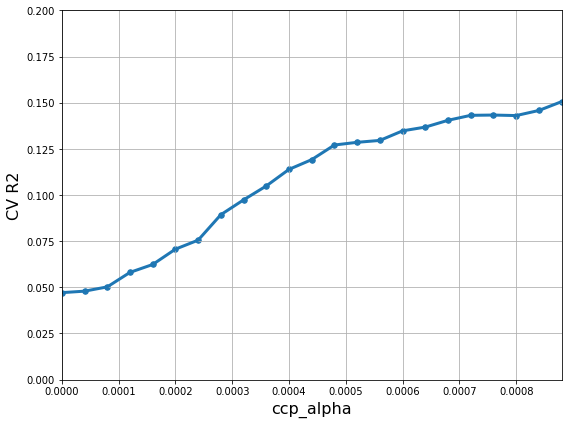

Best ccp_alpha {'ccp_alpha': 0.0015600000000000002}


In [10]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00088])
plt.ylim([0.0, 0.2])

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtr_cv.best_params_)

Node count = 37


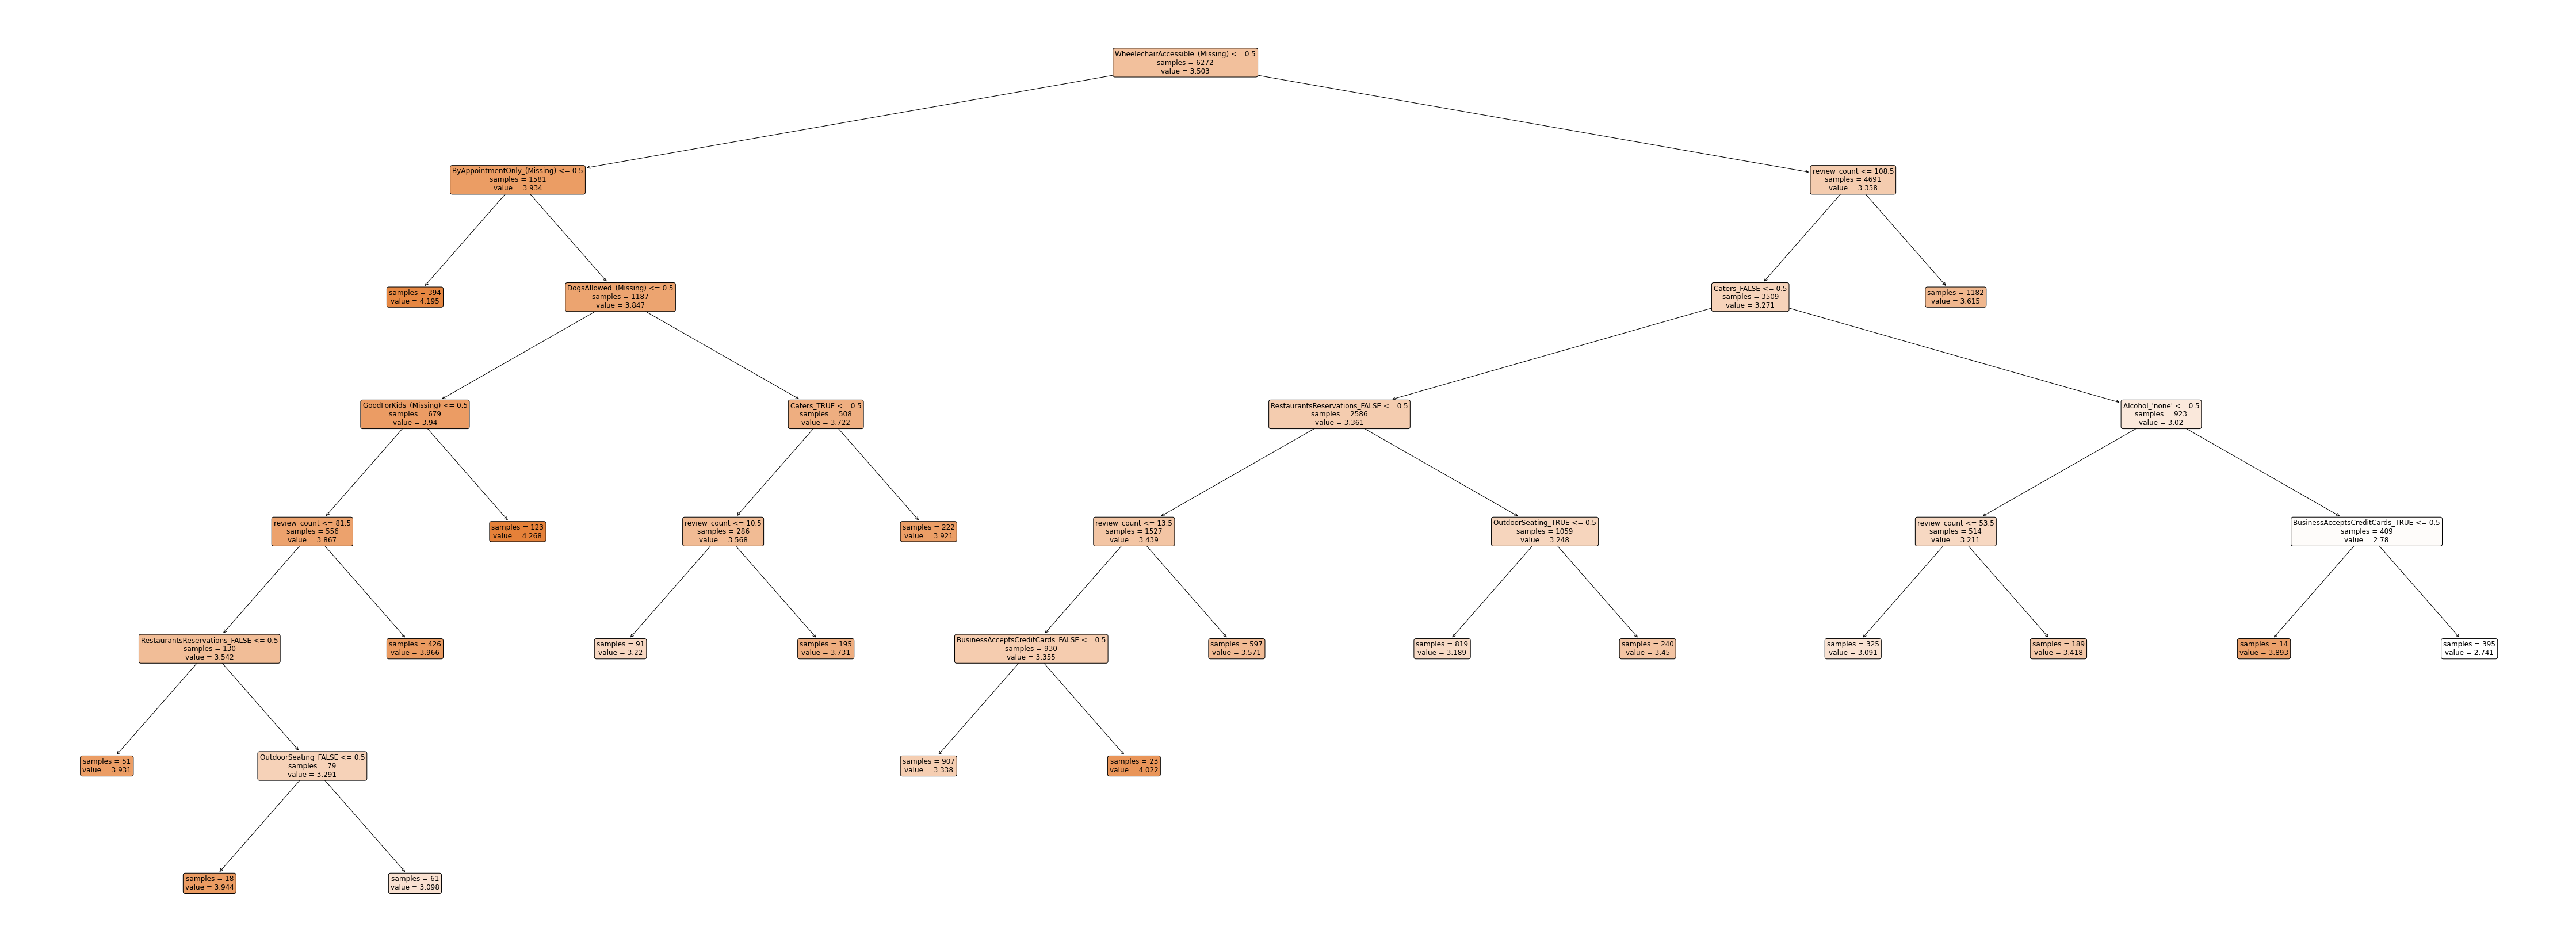

In [11]:
print('Node count =', dtr_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(80,30))
plot_tree(dtr_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

For cross validation, I shuffled the dataset randomnly and split the dataset into k=5 groups. Then for each unique group  I took the group as a test set and remaining as a training set. Then fit the model on the training and evaluated it on the test set in order to retain the ccp_alpha(cp) and OSR2 scores. I selected the cp values of interval 0 and 0.001 and divide with 51 different nodes.

Through grid search, I got a candidate cp value and evaluated the performance of each cp. To do so, I used 5 fold in cv. In this process we are basically estimating the R^2 by training 5 different cart models and and testing the GridsearchCV to perform cross validation. GridSearCV repeats this process until it forms 5 different models with corresponding R^2 for the particular set cp value for each node. Calculating the mean of these R^2,cp value with the highest R^2 best parameter is 0.00156 in our case. By using the best cp value I also plot the tree where cp value prunes CART tree by removing splits that do not sufficiently improve the model fit and our cp dictates the minimum amount of split that must improve the model in order to remain.

iii)  Using the test set data provided in theyelp142test.csvfile, compute theOSR2valuesof your linear regression and regression tree models.  Also,  compute theMAE(meanabsolute error) values of both models.  How do you judge the performance of the twomodels?

In [12]:
#Linear Regression
print('Linear Regression OSR2:', (OSR2_linear(linreg, yelp_train, yelp_test, 'stars')))
print('Linear Regression MAE:', (mean_absolute_error(yelp_test['stars'], linreg.predict(yelp_test))))

Linear Regression OSR2: 0.1804151924120022
Linear Regression MAE: 0.6170871129206774


In [13]:
#Regression Tree
print('Regression Tree OSR2:', (OSR2(dtr_cv, X_test, y_test, y_train)))
print('Regression Tree MAE:', (mean_absolute_error(y_test, dtr_cv.best_estimator_.predict(X_test))))

Regression Tree OSR2: 0.17319613303561898
Regression Tree MAE: 0.614760452679948


For Linear Regression, we are getting a OSR2 of 0.180 and MAE of 0.617. For Regression Tree, we are getting a OSR2 of 0.173 and MAE of 0.614. The two models seem to perform similarly with having a very sligh difference in their numbers output. However, we can conclude that the regression tree is model is better than linear regression as it has higher OSR2 and lower MAE.

## c)

i)  Construct a new variable in your training and test datasets called fourOrAbove.Thisvariable  should  be  equal  to  1  if stars is  greater  than  or  equal  to  4  and  equal  to  0 otherwise.

In [14]:
yelp_train['fourOrAbove'] = yelp_train['stars'].apply(lambda x: 1 if x >= 4 else 0)
yelp_test['fourOrAbove'] = yelp_test['stars'].apply(lambda x: 1 if x >= 4 else 0)

In [15]:
yelp_enc_train1 = pd.get_dummies(yelp_train, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards'
                                           ,'BikeParking','WiFi','ByAppointmentOnly','WheelechairAccessible',
                                           'OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])
y_train1 = yelp_enc_train1['fourOrAbove']
X_train1 = yelp_enc_train1.drop(['fourOrAbove', 'stars'], axis=1)

In [16]:
yelp_enc_test1 = pd.get_dummies(yelp_test, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards'
                                           ,'BikeParking','WiFi','ByAppointmentOnly','WheelechairAccessible',
                                           'OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])
y_test1 = yelp_enc_test1['fourOrAbove']
X_test1 = yelp_enc_test1.drop(['fourOrAbove', 'stars'], axis=1)
X_train1.shape, X_test1.shape

((6272, 36), (2688, 36))

In [17]:
y_train1

0       0
1       0
2       1
3       1
4       0
       ..
6267    1
6268    1
6269    1
6270    0
6271    0
Name: fourOrAbove, Length: 6272, dtype: int64

## d)

i)  In this problem, we will weigh false positives and false negatives equally and thereforefocus on accuracy (equivalently, error rate) as the primary performance metric.  Do youthink this modeling choice is reasonable or not?  Explain your answer.

False Positive is an error in binary classification where a test result incorrectly indicates the presence of a condition but you really don't. False Negative results is an opposite error where you don't have a condition but you really do. Choosing accuracy as the primary performance metric is a reasonable choice because accuracy represents a ratio of correct predictions to total predictions through the equation (TP + TN) / (TP + TN + FP + FN). This will help us determine whether or not the measured value is close to our real value. We want to build a model that gives high accuracy as this means that the model we build is able to predict and identify restaurants with stars more than four.

ii)  A simple approach here is to use the previously built linear regression and regressiontree  models  to  address  the  classification  task  by  thresholding  their  predictions  at  thevalue of 4.  Write code for implementing this thresholding procedure for converting thepredictions of your previously built regression models to predictions of fourOrAbove.

In [18]:
#Converting decision tree regressor to classification
y_prob_dtr = dtr_cv.best_estimator_.predict(X_test)
dtr_cv_pred = (y_prob_dtr >= 4).astype(int)

In [19]:
#Converting Linear Regression prediction to classification
y_prob_linreg = linreg.predict(yelp_test)
linreg_y_pred = pd.Series([1 if x >= 4 else 0 for x in y_prob_linreg], index = y_prob_linreg.index)

iii)  Now build a logistic regression model.  Remember to use all of the provided independentvariables, and you do not have to do variable selection in this problem.  Please again use(Missing)as the reference level to be incorporated into the intercept term.

In [20]:
logreg = smf.logit(formula = 'fourOrAbove ~ review_count + C(GoodForKids, Treatment("(Missing)")) + C(Alcohol, Treatment("(Missing)")) + C(BusinessAcceptsCreditCards, Treatment("(Missing)")) + C(WiFi, Treatment("(Missing)")) + C(BikeParking, Treatment("(Missing)")) + C(ByAppointmentOnly, Treatment("(Missing)")) + C(WheelechairAccessible, Treatment("(Missing)")) + C(OutdoorSeating, Treatment("(Missing)")) + C(RestaurantsReservations, Treatment("(Missing)")) + C(DogsAllowed, Treatment("(Missing)")) + C(Caters, Treatment("(Missing)"))', data = yelp_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.608938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.1113
Time:                        03:02:22   Log-Likelihood:                -3819.3
converged:                       True   LL-Null:                       -4297.5
Covariance Type:            nonrobust   LLR p-value:                9.494e-186
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Inte

Our logistic Model holds the following where Beta at i is the coefficient estimate and x at i is the corresponding variable value.

1/1+e^-(B0+B1x1+B2x2...+Bixi)

= 1/1+e^-(-0.4090+0.1374*GoodForKids[T.False] -0.2631*GoodForKids[T.True]+.......+0.0006*review_count)

iv)  Now build a classification tree model (using an implementation of the CART algorithm).Select the complexity parameter (i.e.,ccpalphain sklearn) value for the tree through cross-validation, and explain how you did the cross-validation and how you selected thecomplexity parameter value.

In [21]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),'min_samples_leaf': [5],'max_depth': [30],'min_samples_split': [20],'random_state': [88]}
dtc = DecisionTreeClassifier()
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=1)
dtc_cv.fit(X_train1, y_train1)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             sco

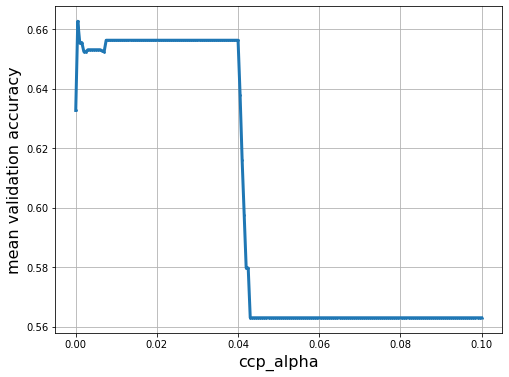

Best ccp_alpha {'ccp_alpha': 0.0005, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}
Grid Best score(Accuracy) 0.6626306258220706


In [25]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
acc = dtc_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp_alpha, acc, s=3)
plt.plot(ccp_alpha, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)
print('Grid Best score(Accuracy)', dtc_cv.best_score_)

Node count = 113


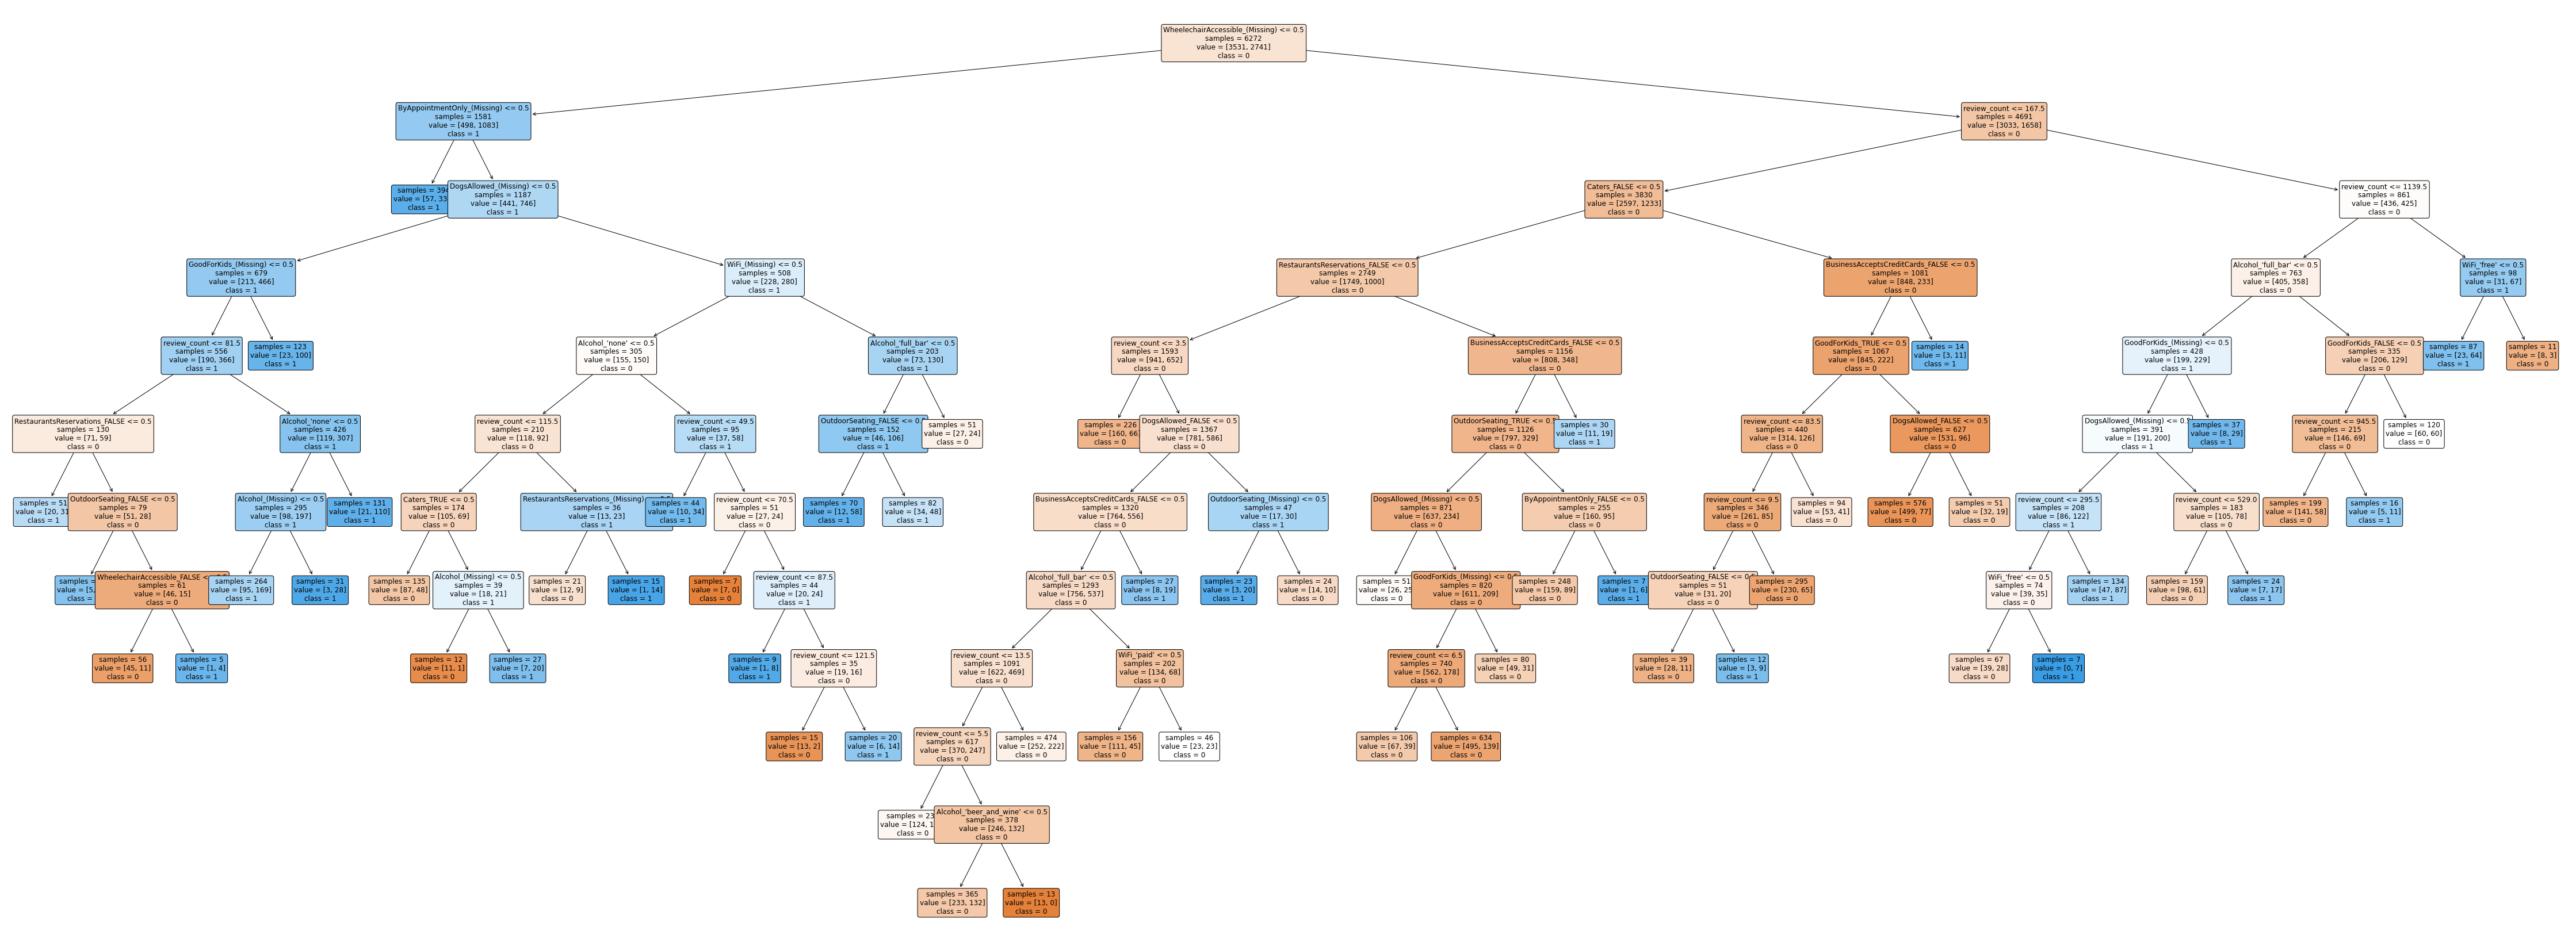

In [26]:
print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(80,30))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

Using grid search and cross validation, I am getting the most optimal cp value for the classification tree model.
Through grid search,I got a candidate cp value and evaluated the performance of each cp. Randomnly Splitting the data into Kfolds = 5 and testing the GridsearchCV to perform cross validation. Then we are fitting the model using the k-1 folds and validating the model using the remaining kth fold and calculating the accuracy.This process repeats until every k-fold serve as test test. Then I take the highest average of the accuracy which is cp of 0.0005, further this value becomes the performance metric for the classification tree model. 

v)  Now  build  a  model  using  “vanilla”  bagging  of  CART  models.   This  can  be  achieved,for example, by settingm(i.e.,maxfeatures in sklearn) equal to the total number of features when training a Random Forest model.

In [27]:
rf_vanilla = RandomForestClassifier(max_features=36, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=2)
rf_vanilla.fit(X_train1, y_train1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.8s finished


RandomForestClassifier(max_features=36, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

vi)  Now build a Random Forest model, and this time use cross-validation to select themvalue for the Random Forests method.  Explain how you did the cross validation andhow you selected the value ofm.

In [28]:
#classification
#Referenced from Lab 7
grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),'min_samples_leaf': [5],'n_estimators': [500],'random_state': [88]} 
tic = time.time()
rf = RandomForestClassifier()
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(X_train1, y_train1)
toc = time.time()
print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_e

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.9s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.9s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.9s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
time: 256.65 s


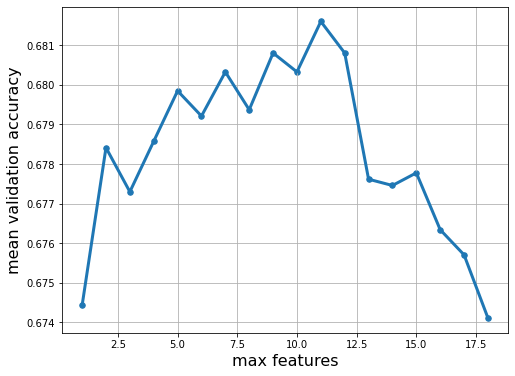

In [29]:
acc = rf_cv.cv_results_['mean_test_score']
max_features = rf_cv.cv_results_['param_max_features'].data

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(max_features, acc, s=30)
plt.plot(max_features, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [30]:
print(rf_cv.best_params_)
print('Cross-validated accuracy:', rf_cv.best_score_)

{'max_features': 11, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
Cross-validated accuracy: 0.6816022671673752


The above cross validation method tells us that max_features represent the number of features considered for splitting at each leaf node. I created a parameter grid to sample from fitting. Min_samples_leaf represents the minimum number of observation is each tree node. Max_features is the maximum variable selection it can take at each split of the fitted trees. I gave 5 for min_samples_leaf and 500 for n_estimators to follow which is a general number selection for a plausible grid values.

To select each split in the tree, the GridsearchCV randomnly examine m features ading the best split possible that uses variables from the tree. In this process we are basically estimating the accuracy by training 5 different random forest model and testing the GridsearchCV to perform cross validation, On each iteration of k=5, the GridsearchCV algorithm choose a different combination of features randomnly and will choose the best params at the end.

The benefit of doing random search is that we are not trying every combination, but selecting at random to sample a wide range of values. From the results of our best_params, I am able to narrow down the ranges of values for each parameter. In our case the value of m is 9 as the max_features for best parameter gave a result of 11 through the plot that was generated above.

vii)  Produce a table for evaluating the performance of the models that you have built.  The table  should  consider  the  following  models:  a  baseline  model  that  predicts  the  mostfrequent outcome for fourOrAbove, the two regression models with thresholding, and all of  the  classification  models  built  in  this  part  of  the  problem.   Additionally,  the  tableshould  report  the  following  performance  metrics:  accuracy  (our  primary  performancemetric), TPR, and FPR. All of these performance metrics should be computed using thetest set data provided in theyelp142test.csvfile.  How do you judge the performance ofthe models?  Do the results seem reasonable to you?  Which model would you recommendfor this problem and why?

In [31]:
#Accuracy for Baseline Model
bm_pred = [0 for i in range(len(y_test1))]
bm_acc = accuracy_score(y_test1, bm_pred)

#confusion matrix
cm = confusion_matrix(y_test1, bm_pred)

#TPR for Baseline
bm_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Baseline
bm_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print("Accuracy", bm_acc)
print("tpr", bm_tpr)
print("fpr", bm_fpr)

Accuracy 0.5487351190476191
tpr 0.0
fpr 0.0


In [32]:
#Linear Regression Threshold Model
lin_acc = accuracy_score(y_test1, linreg_y_pred)

#confusion matrix
cm = confusion_matrix(y_test1, linreg_y_pred)

#TPR for Linear Regression
lin_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
lin_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print("Accuracy", lin_acc)
print("tpr", lin_tpr)
print("fpr", lin_fpr)

Accuracy 0.6116071428571429
tpr 0.1912613355317395
fpr 0.04271186440677966


In [33]:
#Decision Tree Regressor
dtr_acc = accuracy_score(y_test1, dtr_cv_pred)

#confusion matrix
cm = confusion_matrix(y_test1, dtr_cv_pred)

#TPR for Linear Regression
dtr_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
dtr_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print("Accuracy", dtr_acc)
print("tpr", dtr_tpr)
print("fpr", dtr_fpr)

Accuracy 0.6037946428571429
tpr 0.16488046166529266
fpr 0.03525423728813559


In [34]:
#Logistic Regression Threshold
log_prob = logreg.predict(yelp_test)
log_pred = pd.Series([1 if x> 0.5 else 0 for x in log_prob], index = log_prob.index)
log_acc = accuracy_score(y_test1, log_pred)

#confusion matrix
cm = confusion_matrix(y_test1, log_pred)

#TPR for Linear Regression
log_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
log_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print("Accuracy", log_acc)
print("tpr", log_tpr)
print("fpr", log_fpr)

Accuracy 0.6755952380952381
tpr 0.49793899422918386
fpr 0.1783050847457627


In [35]:
#Decision Tree Classifier
dtc_acc = accuracy_score(y_test1, dtc_cv.best_estimator_.predict(X_test1))

#confusion matrix
cm = confusion_matrix(y_test1, dtc_cv.best_estimator_.predict(X_test1))

#TPR for Linear Regression
dtc_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
dtc_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print("Accuracy", dtc_acc)
print("tpr", dtc_tpr)
print("fpr", dtc_fpr)

Accuracy 0.6696428571428571
tpr 0.43940643033800497
fpr 0.14101694915254237


In [36]:
#Vanilla Bagging
vanilla_acc = accuracy_score(y_test1, rf_vanilla.predict(X_test1))

#confusion matrix
cm = confusion_matrix(y_test1, rf_vanilla.predict(X_test1))

#TPR for Linear Regression
vanilla_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
vanilla_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print("Accuracy", vanilla_acc)
print("tpr", vanilla_tpr)
print("fpr", vanilla_fpr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy 0.6715029761904762
tpr 0.5383347073371806
fpr 0.21898305084745762


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [37]:
#Random Forest
rf_acc = accuracy_score(y_test1, rf_cv.best_estimator_.predict(X_test1))

#confusion matrix
cm = confusion_matrix(y_test1, rf_cv.best_estimator_.predict(X_test1))

#TPR for Linear Regression
rf_tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

#FPR for Linear Regression
rf_fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

print("Accuracy", rf_acc)
print("tpr", rf_tpr)
print("fpr", rf_fpr)

Accuracy 0.6848958333333334
tpr 0.5350370981038747
fpr 0.19186440677966102


In [38]:
comparison_data = {'Baseline Model': ['{:.3f}'.format(bm_acc),
                                         '{:.4f}'.format(bm_tpr),
                                         '{:.3f}'.format(bm_fpr)],
                   'Linear Regression Threshold Model': ['{:.3f}'.format(lin_acc),
                                         '{:.4f}'.format(lin_tpr),
                                         '{:.3f}'.format(lin_fpr)],
                   'Decision Tree Regressor': ['{:.3f}'.format(dtr_acc),
                                               '{:.4f}'.format(dtr_tpr),
                                               '{:.3f}'.format(dtr_fpr)],
                   'Logistic Regression Threshold Model': ['{:.3f}'.format(log_acc),
                                                           '{:.4f}'.format(log_tpr),
                                                           '{:.3f}'.format(log_fpr)],
                   'Decision Tree Classifier': ['{:.3f}'.format(dtc_acc),
                                             '{:.4f}'.format(dtc_tpr),
                                             '{:.3f}'.format(dtc_fpr)],
                  'Vanilla Bagging': ['{:.3f}'.format(vanilla_acc),
                                              '{:.4f}'.format(vanilla_tpr),
                                              '{:.3f}'.format(vanilla_fpr)],
                  'Random Forest': ['{:.3f}'.format(rf_acc),
                                              '{:.4f}'.format(rf_tpr),
                                              '{:.3f}'.format(rf_fpr)]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Baseline Model,Linear Regression Threshold Model,Decision Tree Regressor,Logistic Regression Threshold Model,Decision Tree Classifier,Vanilla Bagging,Random Forest
Accuracy,0.549,0.612,0.604,0.676,0.670,0.672,0.685
TPR,0.0000,0.1913,0.1649,0.4979,0.4394,0.5383,0.5350
FPR,0.000,0.043,0.035,0.178,0.141,0.219,0.192


We judge the performance of the model through the accuracy level from the above tabel. Models with higher accuracy level means that they have a better performance as it classified variables/features better to give a high accuracy.
Also, TPR and FPR plays an important role here beause we consider TPR that is closer to 100% and FP closer to 0% as our performance metric for a good model. TPR represents how many correct positive results occur among all positive samples in a test and FPR represents how many incorrect positive results occur among all negative samples. Here, we can see that all the six models have a higher accuracy than the baseline model that has an accuracy level of 54.9%. This outcome seems to be fair to interpret.

I would recommend Random Forest as my model selection because it has the best accuracy amongst all other models as well as a high TPR rate of 53.5% and a fairly low FPR of 19.2% that is closer to 0%. As well, the random forest leverages the power of multiple decision trees which means that it doesn't rely on the feature importance given by a single decision tree. Rather, incorporates many random features that will help us limit our error due to bias and error due to variance. In general, random forest is a strong modeling technique that is more robust than other models that we tested out.

## e)

Suppose that you are a data scientist working for Yelp and you have been tasked with  producing  a  “how  to  guide”  for  Las  Vegas  restaurants,  which  is  supposed  to  includetips for actions restaurants may take to achieve a high star rating.  Use the provided datato construct a list of three such tips.  Each of your tips should be justified by the data, andeach justification should be understandable by a restaurant owner who may not know muchabout  machine  learning.   This  question  is  purposefully  open  ended,  and  you  may  considerusing modeling techniques and/or visualizations to come up with and justify your three tips.

1.We can set up which variable factor is the most important in giving a star rating that is over four. Used random forest model which is an ensemble classifier that uses multiple models of several DTs to obtain a better prediction performance. In this case I wanted to know which specific feature represents the most importance score and by looking at the random forest cv model, review_count scored the highest feature importance of 25.7. Maybe as restaurant owners, it's important to increase the number of review-count they have on yelp because it will affect the star ratings positively. It is more likely that customers will give higher star ratings to those restaurants that have a lot of review counts. The restaurants should come up with strategies to increase the review from customers who visit.

In [39]:
df_importance = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
df_importance.sort_values('Importance score', ascending=False).head(10)

,Feature,Importance score
0,review_count,27.4
21,WheelechairAccessible_(Missing),10.8
23,WheelechairAccessible_TRUE,7.0
30,DogsAllowed_(Missing),4.9
34,Caters_FALSE,2.9
31,DogsAllowed_FALSE,2.9
28,RestaurantsReservations_FALSE,2.8
18,ByAppointmentOnly_(Missing),2.4
6,Alcohol_'none',2.3
25,OutdoorSeating_FALSE,2.3


2.I thought checking out the wifi cateogry can be an interesting factor. I recommend that restaurant owners offer free wifi to their customers instead of having them pay or not offering at all. As we can see in the below graph, there's a higher percentage of four or more stars given to restaurants that offered free wifi. We can see here that there's a high lowstar rate when a restaurant makes a customer pay for their wifi.

In [40]:
def calculate_percent(a, total): 
    return a/total

Text(0, 0.5, 'Percentage')

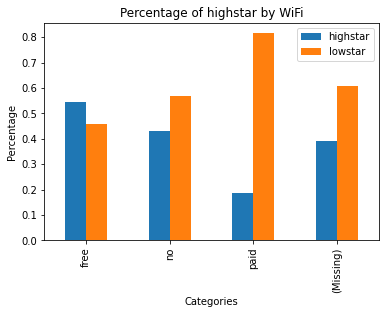

In [41]:
highstar = yelp_test[yelp_test.fourOrAbove == 1]
lowstar = yelp_test[yelp_test.fourOrAbove == 0]

wifi_yes = highstar.groupby(['WiFi']).size().values
wifi_no = lowstar.groupby(['WiFi']).size().values
total = wifi_yes + wifi_no

highstar_p = calculate_percent(wifi_yes, total)
lowstar_p = calculate_percent(wifi_no, total)

index = ['free', 'no', 'paid', '(Missing)']
plotdata = pd.DataFrame({'highstar': highstar_p,'lowstar': lowstar_p}, index=index)
ax = plotdata.plot(kind = 'bar', title = "Percentage of highstar by WiFi")
ax.set_xlabel("Categories")
ax.set_ylabel("Percentage")

3.I recommend restaurant owners to have a full bar with a range of alcohol collection. After doing analysis on the highstar rated restaurants and how their alcohol selection was like, I was able to discover that restaurants with full bar has a higher star rating count than that of beer and wine selection. Especially in Vegas where most people visit as a vacation with friends and families, offering a wide range of alcohol or special drink selection could make the restaurant stand out against other restaurants.

Text(0, 0.5, 'Categories')

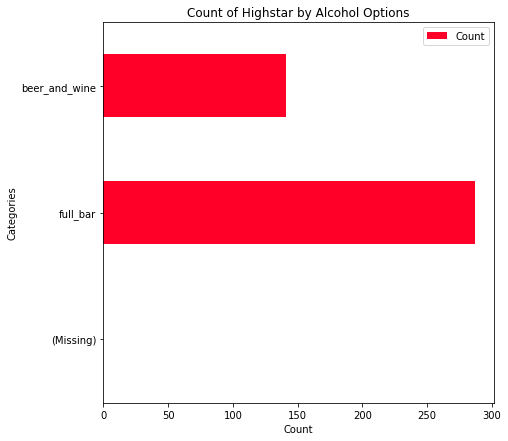

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
selected_words = ['(Missing)', 'full_bar', 'beer_and_wine']
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
selected_word_count = vectorizer.fit_transform(highstar['Alcohol'].values.astype('U'))
vectorizer.get_feature_names()
word_count_array = selected_word_count.toarray()
word_count_array.sum(axis=0)

temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
ax = temp.plot(kind='barh', stacked=False, figsize=[7,7], colormap='gist_rainbow', title = "Count of Highstar by Alcohol Options")
ax.set_xlabel("Count")
ax.set_ylabel("Categories")